# Obesity risk factors classification

In [2]:
# import the nescessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes
from sklearn import svm
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
#importing the dataset
file_path = 'ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
#checking for the data size and types
print(data.dtypes)
print(data.shape)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object
(2111, 17)


### Data cleaning and processing

In [5]:
# checking for the null value in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

since there is no null value we can continue to data processing

In [6]:
# radomizing the order in dataset
data = data.sample(frac=1, random_state=45).reset_index(drop=True)

In [7]:
# seperating data into classes and variables
attributes = data.iloc[:,: -1]
labels = data.iloc[:, -1]
attributes.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,37.631769,1.513202,75.410647,yes,yes,2.0,2.582591,Sometimes,no,1.535134,no,1.884520,0.000000,Sometimes,Automobile
1,Female,25.897815,1.664463,102.781971,yes,yes,3.0,3.000000,Sometimes,no,1.068493,no,0.112122,1.000000,Sometimes,Public_Transportation
2,Female,18.000000,1.620000,68.000000,no,no,2.0,1.000000,Sometimes,no,1.000000,no,0.000000,2.000000,no,Public_Transportation
3,Male,18.014333,1.751029,80.000000,yes,yes,2.0,2.805436,Sometimes,no,2.122884,no,0.045651,0.017225,Frequently,Public_Transportation
4,Male,23.083621,1.848553,121.421121,yes,yes,3.0,2.567567,Sometimes,no,2.011023,no,0.916478,0.000000,Sometimes,Public_Transportation


In [8]:
# since height and weight is a function of body type, we will drop these two variables to focus on the other risk factors
attributes = attributes.drop('Height', axis=1)
attributes = attributes.drop('Weight', axis=1)
attributes.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,37.631769,yes,yes,2.0,2.582591,Sometimes,no,1.535134,no,1.884520,0.000000,Sometimes,Automobile
1,Female,25.897815,yes,yes,3.0,3.000000,Sometimes,no,1.068493,no,0.112122,1.000000,Sometimes,Public_Transportation
2,Female,18.000000,no,no,2.0,1.000000,Sometimes,no,1.000000,no,0.000000,2.000000,no,Public_Transportation
3,Male,18.014333,yes,yes,2.0,2.805436,Sometimes,no,2.122884,no,0.045651,0.017225,Frequently,Public_Transportation
4,Male,23.083621,yes,yes,3.0,2.567567,Sometimes,no,2.011023,no,0.916478,0.000000,Sometimes,Public_Transportation


In [9]:
# encoding variable into binomial and numerical value
var_encoding = {'Gender':                         {'Male': 0, 'Female': 1},
                'family_history_with_overweight': {'yes': 1, 'no': 0},
                'FAVC':                           {'yes': 1, 'no': 0},
                'CAEC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3},
                'SMOKE':                          {'yes': 1, 'no': 0},
                'SCC':                            {'yes': 1, 'no': 0},
                'CALC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3}}
attributes = attributes.replace(var_encoding)
attributes.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,37.631769,1,1,2.0,2.582591,1,0,1.535134,0,1.884520,0.000000,1,Automobile
1,1,25.897815,1,1,3.0,3.000000,1,0,1.068493,0,0.112122,1.000000,1,Public_Transportation
2,1,18.000000,0,0,2.0,1.000000,1,0,1.000000,0,0.000000,2.000000,0,Public_Transportation
3,0,18.014333,1,1,2.0,2.805436,1,0,2.122884,0,0.045651,0.017225,2,Public_Transportation
4,0,23.083621,1,1,3.0,2.567567,1,0,2.011023,0,0.916478,0.000000,1,Public_Transportation


In [10]:
# for MTRANS, we will use one-hot encoding method since their is no linear relationship between each variables
mtrans = pd.get_dummies(attributes['MTRANS'])
mtrans.head()

,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [11]:
# combining the encoded MTRANS with the rest of the variables
attributes = attributes.drop('MTRANS', axis=1)
attributes = pd.concat([attributes, mtrans], axis=1)
attributes.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,37.631769,1,1,2.0,2.582591,1,0,1.535134,0,1.884520,0.000000,1,1,0,0,0,0
1,1,25.897815,1,1,3.0,3.000000,1,0,1.068493,0,0.112122,1.000000,1,0,0,0,1,0
2,1,18.000000,0,0,2.0,1.000000,1,0,1.000000,0,0.000000,2.000000,0,0,0,0,1,0
3,0,18.014333,1,1,2.0,2.805436,1,0,2.122884,0,0.045651,0.017225,2,0,0,0,1,0
4,0,23.083621,1,1,3.0,2.567567,1,0,2.011023,0,0.916478,0.000000,1,0,0,0,1,0


## Classification

In [12]:
# creating a train test split
X_train, X_test, y_train, y_test = train_test_split(attributes, labels, test_size=0.2, random_state=0, stratify=labels)

### Naive Bayes classifier

C:\Users\Ice\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\Ice\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ice\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


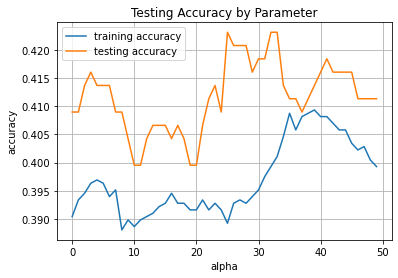

In [88]:
# mapping out the effect of parameters to accuracy
training_accuracy = []
testing_accuracy = []
alphas = range(0,50)
for i in alphas:
    classifier = naive_bayes.MultinomialNB(alpha=i, fit_prior=False)
    classifier.fit(X_train, y_train)
    training_accuracy.append(accuracy_score(y_train,
                                            classifier.predict(X_train)))
    testing_accuracy.append(accuracy_score(y_test,
                                           classifier.predict(X_test)))
plt.figure()
sns.lineplot(alphas, training_accuracy, label='training accuracy')
sns.lineplot(alphas, testing_accuracy, 
             label='testing accuracy')
plt.title('Testing Accuracy by Parameter')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

In [13]:
#creating a classifier
nb_cla = naive_bayes.MultinomialNB(alpha=35, fit_prior=False)

In [14]:
#training the model
nb_cla.fit(X_train, y_train)

MultinomialNB(alpha=35, fit_prior=False)

In [91]:
# timing the processing time
%timeit nb_cla.fit(X_train, y_train)

5.4 ms ± 431 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [92]:
# testing for in-sample and off-sample accuracy
nb_y_train = nb_cla.predict(X_train)
nb_y_test = nb_cla.predict(X_test)
nb_train_acc = accuracy_score(y_train, nb_y_train)
nb_test_acc = accuracy_score(y_test, nb_y_test)
print('The training accuracy is:', nb_train_acc)
print('The testing accuracy is:', nb_test_acc)

The training accuracy is: 0.4087677725118483
The testing accuracy is: 0.41134751773049644


In [93]:
# 5-folds crossvalidation
nb_5_folds = cross_val_score(nb_cla, attributes, labels, cv=5)
nb_5_folds_mean = nb_5_folds.mean()
nb_5_folds_var = nb_5_folds.var()
print('the 5-folds crossvalidation accuracy scores are:', nb_5_folds)
print('the 5-folds crossvalidation mean score is:', nb_5_folds_mean)
print('the 5-folds crossvalidation varience is:', nb_5_folds_var)

the 5-folds crossvalidation accuracy scores are: [0.39952719 0.4028436  0.38388626 0.38388626 0.40047393]
the 5-folds crossvalidation mean score is: 0.3941234468309189
the 5-folds crossvalidation varience is: 7.103406954831497e-05


Text(90.77375, 0.5, 'predicted label')

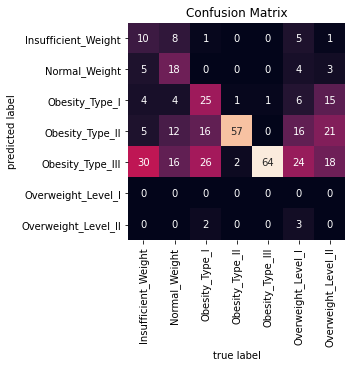

In [94]:
# creating a confusion matrix
nb_matrix = confusion_matrix(y_test,nb_y_test)
sns.heatmap(nb_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=nb_cla.classes_, yticklabels=nb_cla.classes_)
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

### Support Vector Machine Classifier

In [95]:
# mapping out the effect of parameters to accuracy
kernels = ['linear', 'rbf', 'poly']
scores = [1, 2, 3, 4, 5]
kernel_cv = pd.DataFrame(index=scores, columns=kernels)
for i in kernels:
    clf = svm.SVC(kernel=i, random_state=45, gamma=0.1)
    clf.fit(X_train, y_train)
    cv = cross_val_score(clf, attributes, labels, cv=5)
    kernel_cv[i] = cv

Text(0.5, 15.0, 'kernels')

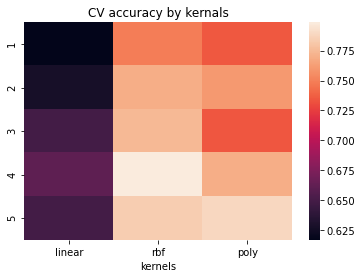

In [96]:
sns.heatmap(kernel_cv)
plt.title('CV accuracy by kernals')
plt.xlabel('kernels')

In [15]:
#creating a classifier
model = svm.SVC(kernel='rbf')
parameters = [{'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 0.05, 0.1]}]
svm_gridsearch = GridSearchCV(svm.SVC(), parameters, scoring='accuracy')
svm_gridsearch.fit(X_train, y_train)
svm_cla = svm_gridsearch.best_estimator_

In [16]:
#training the model
svm_cla.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [99]:
# timing the processing time
%timeit svm_cla.fit(X_train, y_train)

95.6 ms ± 306 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [100]:
# testing for in-sample and off-sample accuracy
svm_y_train = svm_cla.predict(X_train)
svm_y_test = svm_cla.predict(X_test)
svm_train_acc = accuracy_score(y_train, svm_y_train)
svm_test_acc = accuracy_score(y_test, svm_y_test)
print('The training accuracy is:', svm_train_acc)
print('The testing sample accuracy is:', svm_test_acc)

The training accuracy is: 0.9561611374407583
The testing sample accuracy is: 0.7943262411347518


In [101]:
# 5-folds crossvalidation
svm_5_folds = cross_val_score(svm_cla, attributes, labels, cv=5)
svm_5_folds_mean = svm_5_folds.mean()
svm_5_folds_var = svm_5_folds.var()
print('the 5-folds crossvalidation accuracy scores are:', svm_5_folds)
print('the 5-folds crossvalidation mean score is:', svm_5_folds_mean)
print('the 5-folds crossvalidation varience is:', svm_5_folds_var)

the 5-folds crossvalidation accuracy scores are: [0.77068558 0.7985782  0.82701422 0.80805687 0.79620853]
the 5-folds crossvalidation mean score is: 0.8001086798202861
the 5-folds crossvalidation varience is: 0.0003340708257660608


Text(90.77375, 0.5, 'predicted label')

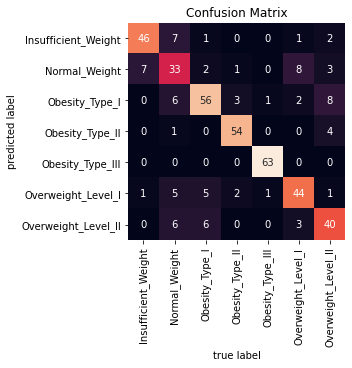

In [102]:
# creating a confusion matrix
svm_matrix = confusion_matrix(y_test,svm_y_test)
sns.heatmap(svm_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=svm_cla.classes_, yticklabels=svm_cla.classes_)
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

### Random Forest Classifier

In [133]:
# mapping out the effect of parameters to accuracy
acc_df = pd.DataFrame(columns=range(5 , 30, 5), index=range(10 , 101, 10))

for i in range(10 , 101, 10):
    for j in range(5 , 31, 5):
        clf = ensemble.RandomForestClassifier(n_estimators=i, max_depth=j, random_state=30)
        clf.fit(X_train, y_train)
        cv = cross_val_score(clf, attributes, labels, cv=5)
        cv_mean = cv.mean()
        acc_df.loc[i, j] = cv_mean

acc_df = acc_df.astype('float')

Text(33.0, 0.5, 'tree depth')

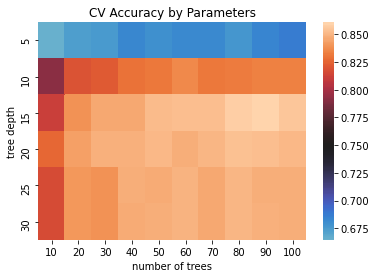

In [137]:
sns.heatmap(acc_df.T, center=0.75)
plt.title('CV Accuracy by Parameters')
plt.xlabel('number of trees')
plt.ylabel('tree depth')

In [17]:
#creating a classifier
rf_cla = ensemble.RandomForestClassifier(max_depth=15, n_estimators=90)

In [18]:
#training the model
rf_cla.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=90)

In [140]:
# timing the processing time
%timeit rf_cla.fit(X_train, y_train)

185 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [141]:
# testing for in-sample and off-sample accuracy
rf_y_train = rf_cla.predict(X_train)
rf_y_test = rf_cla.predict(X_test)
rf_train_acc = accuracy_score(y_train, rf_y_train)
rf_test_acc = accuracy_score(y_test, rf_y_test)
print('The training is:', rf_train_acc)
print('The testing accuracy is:', rf_test_acc)

The training is: 0.9994075829383886
The testing accuracy is: 0.8676122931442081


In [142]:
# 5-folds crossvalidation
rf_5_folds = cross_val_score(rf_cla, attributes, labels, cv=5)
rf_5_folds_mean = rf_5_folds.mean()
rf_5_folds_var = rf_5_folds.var()
print('the 5-folds crossvalidation accuracy scores are:', rf_5_folds)
print('the 5-folds crossvalidation mean score is:', rf_5_folds_mean)
print('the 5-folds crossvalidation varience is:', rf_5_folds_var)

the 5-folds crossvalidation accuracy scores are: [0.8392435  0.85781991 0.84834123 0.86018957 0.86492891]
the 5-folds crossvalidation mean score is: 0.8541046239342096
the 5-folds crossvalidation varience is: 8.441296344085706e-05


Text(90.77375, 0.5, 'predicted label')

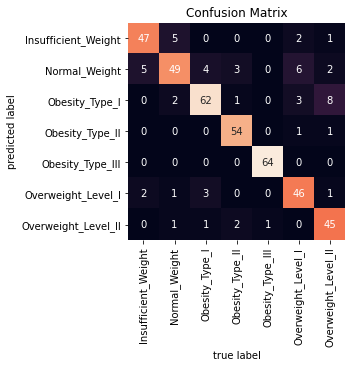

In [143]:
# creating a confusion matrix
rf_matrix = confusion_matrix(y_test,rf_y_test)
sns.heatmap(rf_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=rf_cla.classes_, yticklabels=rf_cla.classes_)
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [50]:
sample_attributes = X_train.iloc[5:8,:]
sample_attributes

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking
1753,1,22.422674,1,1,2.674431,3.000000,2,0,2.453384,0,1.321624,1.990617,0,0,0,0,1,0
556,0,31.315593,1,1,2.190110,2.029858,1,0,2.348981,0,1.946907,0.000000,1,1,0,0,0,0
1955,1,40.000000,1,1,2.948248,3.000000,1,0,2.429911,0,0.119640,0.360193,1,1,0,0,0,0


In [51]:
sample_labels = y_train[5:8]
sample_labels

1753    Insufficient_Weight
556          Obesity_Type_I
1955     Overweight_Level_I
Name: NObeyesdad, dtype: object

In [52]:
nb_labels = nb_cla.predict(sample_attributes)
rf_labels = rf_cla.predict(sample_attributes)
svm_labels = svm_cla.predict(sample_attributes)

In [53]:
columns = ['true_labels', 'NB_labels', 'RF_labels', 'SVM_labels']
example = pd.DataFrame(columns=columns)
example['true_labels'] = sample_labels
example['NB_labels'] = nb_labels
example['RF_labels'] = rf_labels
example['SVM_labels'] = svm_labels
example

,true_labels,NB_labels,RF_labels,SVM_labels
1753,Insufficient_Weight,Insufficient_Weight,Insufficient_Weight,Insufficient_Weight
556,Obesity_Type_I,Obesity_Type_II,Obesity_Type_I,Obesity_Type_I
1955,Overweight_Level_I,Overweight_Level_II,Overweight_Level_I,Overweight_Level_I
